# Multiple Correspondence Analysis
This notebook describes and implements the correspondence analysis in python. The formulas comes from the paper
[Computation of Multiple Correspondence Analysis, with code in R by Oleg Nenadic](https://core.ac.uk/download/pdf/6591520.pdf)

### Multiple correspondence analysis (MCA) is essentially the application of the simple correspondence analysis (CA) algorithm to multivariate categorical data coded in the form of an indicator matrix or a Burt matrix (see, for example, Greenacre, 1984, 1993, 2005). Blasius and Greenacre (1994) described in detail the computations involved in CA.

Requirements: 
* python2 or 3 (Developed in Python2, should be able to run in python3 as well)
* pandas
* numpy
* matplotlib / bokeh

If you are interested in a popular package, please use Max Halford's [Prince package](https://github.com/MaxHalford/Prince) instead.

Thanks Tom Augspurger for his data on his [github](https://github.com/TomAugspurger/skmca ).

In [1]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('./Data/MCA/wg93.txt', delimiter='\t')
# The data comes from 
# Number of questions
Q = 4
# The number of columns for questions after applying one_hot encoding 
J = 20

In [41]:
df.head()

,A,B,C,D,sex,age,edu
0,2,3,4,3,2,2,3
1,3,4,2,3,1,3,4
2,2,3,2,4,2,3,2
3,2,2,2,2,1,2,3
4,3,3,3,3,1,5,2


In [42]:
column_names = []
for name in df.columns:
    for value in np.unique(df[name].values):
        column_names.append(name+"_"+str(int(value)))

### Get Burt Table from indicator matrix(One hot encoding of the original values)  

In [43]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse = False)
indicator_matrix = pd.DataFrame(one_hot.fit_transform(df), columns=column_names)

supplementary_matrix = indicator_matrix[column_names[J:]]
column_names = column_names[:J]
indicator_matrix = indicator_matrix[column_names]

In [44]:
indicator_matrix.head()

,A_1,A_2,A_3,A_4,A_5,B_1,B_2,B_3,B_4,B_5,C_1,C_2,C_3,C_4,C_5,D_1,D_2,D_3,D_4,D_5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
supplementary_matrix.head()

,sex_1,sex_2,age_1,age_2,age_3,age_4,age_5,age_6,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
burt_table = pd.DataFrame(np.dot(indicator_matrix.T, indicator_matrix), columns=column_names, index=column_names)

### Computations based on the Burt matrix

Divide $C$ (indicator matrix) by its grand total $n=\sum_{i,j}c_{i,j}$ to obtian the correspondence matrix $P$:

$$P = \left\{p_{i,j}\right\} = c_{i,j} / n$$

and calculate the row totals(masses) $r_i$ (equal to column masses)

In [48]:
correspondence_mat = burt_table/burt_table.sum().sum()

Since the matrix of standardized residuals in the analysis of C is positive definite symmetric, the singular values in the analysis of C are also eigenvalues.

Perform an eigenvalue-eigenvector decomposition on the standardized resduals A   
$S = \left\{s_{i,j}\right\} = (p_{i,j} - r_ir_j)\ / \sqrt{r_ir_j} $

In [49]:
row_total = correspondence_mat.sum(axis = 1).values
residual = np.outer(row_total.T, row_total)
S = np.divide((correspondence_mat - residual), np.sqrt(residual))

### Use SVD to calculate the eigenvector and eigenvalues

In [50]:
u, s, v = np.linalg.svd(S)
# Multiply eigenvector by -1 to match with the paper
u = -u
analysis_columns = burt_table.columns

### This is the part I am unsure about, since eigenvectors are sorted based on eigenvalues, then should we sort the columns as well?

In [67]:
# ss, _ =np.linalg.eig(S)
# idx = ss.argsort()[::-1]
# # s = s[idx]
# # u = u[:,idx]
# analysis_columns = np.take(burt_table.columns.values, idx)
# burt_table = burt_table[analysis_columns]

### The principal inertias of Z is the eigenvalues squared

In [53]:
principal_inertias = pd.DataFrame(columns=analysis_columns)
lambda_sqr = pd.DataFrame(s**2, index=burt_table.columns)
percent = pd.DataFrame(lambda_sqr/lambda_sqr.sum(), index=analysis_columns)
principal_inertias = principal_inertias.append(lambda_sqr.T)
principal_inertias = principal_inertias.append(percent.T * 100)

### Note the graph in the paper dropped all the zero values. Therefore column 16 is D_1 in this case

In [54]:
pd.options.display.float_format = '{:,.4f}'.format
principal_inertias

,A_1,A_2,A_3,A_4,A_5,B_1,B_2,B_3,B_4,B_5,C_1,C_2,C_3,C_4,C_5,D_1,D_2,D_3,D_4,D_5
0,0.2092,0.1857,0.1036,0.0939,0.0760,0.0635,0.0588,0.0552,0.0508,0.0487,0.0440,0.0389,0.0316,0.0286,0.0234,0.0157,0.0000,0.0000,0.0000,0.0000
0,18.5509,16.4702,9.1902,8.3291,6.7392,5.6281,5.2173,4.8951,4.5080,4.3166,3.9046,3.4467,2.8060,2.5361,2.0709,1.3910,0.0000,0.0000,0.0000,0.0000


#### Pick the number of dimentions

In [55]:
dimensions = 2

The i-th row standard coordinate for the s-th dimension is obtained as 
$$a_{is} = u_{is}/\sqrt{r_i} $$

In [56]:
a_s = np.divide(u[:,:dimensions], np.sqrt(row_total)[:, None])

The corresponding principle coordinates are given by
$$f_{is}=a_{is}\lambda_s$$

In [57]:
f_s = np.multiply(a_s, s[:,None]).T

### Create index name for each row and clean the data into a matrix

In [58]:
analysis_index = []
u_i, a_i, f_i = [], [], []
for i in range(dimensions):
    u_i.append('$u_'+str(i+1)+'$')
    a_i.append('$a_'+str(i+1)+'$')
    f_i.append('$f_'+str(i+1)+'$')
analysis_index.extend(u_i)
analysis_index.append('$r_i$')
analysis_index.extend(a_i)
analysis_index.extend(f_i)

# Stack the eigenvectors, row total, standard and lower dimension coordinates together.
analysis_result =np.vstack([u[:,:dimensions].T, row_total, a_s.T, f_s])
analysis_table = pd.DataFrame(analysis_result, columns=analysis_columns, index=analysis_index)

Table below contains a part of the eigenvectors for the first two dimensions ($u_{i1}$ and $u_{i2}$),
the (row or column) category masses ($r_i$) and the (row or column) standard and principal
coordinates ($a_{i1}$ and $a_{i2}$ and $f_{i1}$ and $f_{i2}$, respectively)

In [59]:
pd.options.display.float_format = '{:,.3f}'.format
analysis_table

,A_1,A_2,A_3,A_4,A_5,B_1,B_2,B_3,B_4,B_5,C_1,C_2,C_3,C_4,C_5,D_1,D_2,D_3,D_4,D_5
$u_1$,0.339,0.166,-0.108,-0.264,-0.234,0.417,0.143,0.084,-0.203,-0.271,0.451,0.074,-0.147,-0.284,-0.179,0.158,-0.057,-0.093,-0.056,0.147
$u_2$,-0.134,0.086,0.290,-0.167,-0.290,-0.196,0.149,0.234,0.080,-0.423,-0.190,0.178,0.248,-0.133,-0.369,-0.239,0.002,0.279,0.054,-0.240
$r_i$,0.034,0.092,0.059,0.051,0.014,0.020,0.050,0.059,0.081,0.040,0.044,0.091,0.057,0.044,0.015,0.017,0.067,0.058,0.065,0.043
$a_1$,1.837,0.546,-0.447,-1.166,-1.995,2.924,0.642,0.346,-0.714,-1.354,2.158,0.247,-0.619,-1.349,-1.468,1.204,-0.221,-0.385,-0.222,0.708
$a_2$,-0.727,0.284,1.199,-0.737,-2.470,-1.370,0.667,0.964,0.280,-2.108,-0.909,0.592,1.044,-0.635,-3.017,-1.822,0.007,1.159,0.211,-1.152
$f_1$,0.840,0.235,-0.144,-0.357,-0.550,0.737,0.156,0.081,-0.161,-0.299,0.453,0.049,-0.110,-0.228,-0.224,0.151,-0.000,-0.000,-0.000,0.000
$f_2$,-0.333,0.123,0.386,-0.226,-0.681,-0.345,0.162,0.226,0.063,-0.465,-0.191,0.117,0.186,-0.107,-0.461,-0.228,0.000,0.000,0.000,-0.000


### Adjusted inertia
We adjust the intertia to deal with the "percentage of inertia problem"

$$\lambda_s^{adj} = \left(\frac{Q}{Q-1}\right)^2 \left(\lambda_s - \frac{1}{Q}\right)^2$$

The adjusted inertias are calculated only for each singular value $λ_s$ that satisfies the inequality $\lambda_s \leq 1/Q$. They are expressed as a percentage of the average off-diagonal inertia, which can be calculated either by direct calculation on the off-diagonal tables in the Burt matrix, or from the total inertia of C as follows:

$$\frac{Q}{Q-1}\left(inertia(C) - \frac{J-Q}{Q^2}\right)$$

where inertia(C) is the sum of the principal inertias 􏰁$\sum_s λ_s^2$ in Table 7. The value of (6) in ss
our ISSP example is 0.17024 and Table 9 lists the adjusted inertias for the six dimensions that satisfy $λ_s ≤ \frac{1}{4}$ .

In [60]:
lambda_adj = (Q /(Q-1.0))**2 * (s[s>=1.0/Q] - 1.0/Q)**2 
total_adj = (Q /(Q-1.0)) * (np.sum(s**2) - ((J-Q+0.0)/Q**2))
pd.DataFrame(np.round(np.vstack([np.round(lambda_adj, 5), np.round(lambda_adj/total_adj * 100, 1)]), 3), columns=analysis_columns[s>=1.0/Q])

,A_1,A_2,A_3,A_4,A_5,B_1
0,0.076,0.058,0.009,0.006,0.001,0.000
1,44.900,34.200,5.400,3.300,0.700,0.000


### Supplementary Variables
We are using the second methods for supplementary variables, since it is prefered.
This supplementary variables method is based on averaging the respondent row points in principal coordinates.
$$C^* = Z^{*T}Z\ \{\textit{where }Z^*\textit{ is the indicator matrix of the supplementary variables}\} $$

In [61]:
# [row, J*]^T X [row, J] => [J*, J]
ct_star = np.dot(supplementary_matrix.T, indicator_matrix)

We can then calculate the position of the supplementary columns by doing the following:
$$\tilde{g_{js}} = \sum_{i=1}^J \frac{c_{ij}^*}{c_{\dot{} j}^*}\tilde{a}_{is}$$

In [62]:
# Calculate the row sum => [J*, 1]
cs_star = ct_star.sum(axis = 1)
# Divide C_star_ij by C_star.j first
base = ct_star / cs_star[:, None]
#Multiply by the a calculated from previous computation [J*, J] X [J, # of dimensions] => [J*,  # of dimensions]
base_star = np.dot(base, a_s)

In [63]:
sub_cord = pd.DataFrame(base_star.T, columns=supplementary_matrix.columns)
sub_cord.head()

,sex_1,sex_2,age_1,age_2,age_3,age_4,age_5,age_6,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6
0,-0.097,0.093,-0.112,-0.059,-0.017,-0.021,0.011,0.190,0.122,0.109,-0.046,-0.154,-0.116,-0.209
1,0.019,-0.018,-0.009,-0.053,-0.003,0.038,0.031,0.022,0.039,0.061,0.059,-0.183,-0.172,-0.191


In [64]:
pd.reset_option('^display.', silent=True)

### Plots

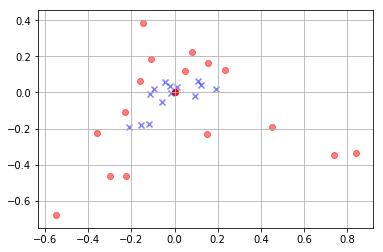

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
# figsize=(40, 30)
plt.grid()
# plt.margins()
# Questions coordinates
ax.scatter(f_s[0], f_s[1], c='r', alpha = 0.5)
# Supplementary variables coordinates
ax.scatter(sub_cord.values[0], sub_cord.values[1], c='b',marker='x', alpha = 0.5)

### Better interactive plot

In [ ]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LabelSet

p = figure(title = "Multiple Correspondence Analysis", plot_width=2000,plot_height = 1000)
## Convert the df to column tables
values = pd.DataFrame(f_s, index=['x', 'y']).T
values['symbol'] = burt_table.columns
source = ColumnDataSource(values)

p.circle('x', 'y', fill_alpha=0.2, fill_color='blue', size=10, source = source)
labels = LabelSet(x="x", y="y", text="symbol", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

supp_values = pd.DataFrame(sub_cord.values, index=['a', 'b']).T
supp_values['supp'] = supplementary_matrix.columns
supp_source = ColumnDataSource(supp_values)

p.diamond('a', 'b', fill_alpha=0.2, fill_color='red', size=10, source = supp_source)
supp_labels = LabelSet(x="a", y="b", text="supp", y_offset=8,
                  text_font_size="8pt", text_color="black",
                  source=supp_source, text_align='center')

p.add_layout(supp_labels)


output_file("mca.html", title="MCA example")

show(p)